In [1]:
MY_PATH = ''
#data_file = MY_PATH + 'sample_prediction_0.csv'
data_file = MY_PATH + 'sample_prediction_1.csv'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy import trapz

In [4]:
df = pd.read_csv(data_file)

In [5]:
y_val = df["actual"]
y_pred = df["prediction"]

actual_positive = (y_val == 1)
actual_negative = (y_val == 0)

t = 0.5
predict_positive = (y_pred >= t)
predict_negative = (y_pred < t)

tp = (predict_positive & actual_positive).sum()
tn = (predict_negative & actual_negative).sum()
fp = (predict_positive & actual_negative).sum()
fn = (predict_negative & actual_positive).sum()

In [6]:
confusion_matrix = np.array([
    [tn, fp],
    [fn, tp]
])
(confusion_matrix / confusion_matrix.sum()).round(2)

array([[0.38, 0.12],
       [0.13, 0.37]])

In [7]:
p = tp / (tp + fp)
r = tp / (tp + fn)
print(p)
print(r)

0.7551020408163265
0.74


In [8]:
tpr = tp / (tp + fn)
fpr = fp / (fp + tn)
print(tpr)
print(fpr)

0.74
0.24


In [9]:
def tpr_fpr_dataframe(y_val, y_pred):
    scores = []

    thresholds = np.linspace(0, 1, 101)

    for t in thresholds:
        actual_positive = (y_val == 1)
        actual_negative = (y_val == 0)

        predict_positive = (y_pred >= t)
        predict_negative = (y_pred < t)

        tp = (predict_positive & actual_positive).sum()
        tn = (predict_negative & actual_negative).sum()

        fp = (predict_positive & actual_negative).sum()
        fn = (predict_negative & actual_positive).sum()

        scores.append((t, tp, fp, fn, tn))

    columns = ['threshold', 'tp', 'fp', 'fn', 'tn']
    df_scores = pd.DataFrame(scores, columns=columns)

    df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn)
    df_scores['fpr'] = df_scores.fp / (df_scores.fp + df_scores.tn)
    
    return df_scores

In [10]:
df_scores = tpr_fpr_dataframe(y_val, y_pred)

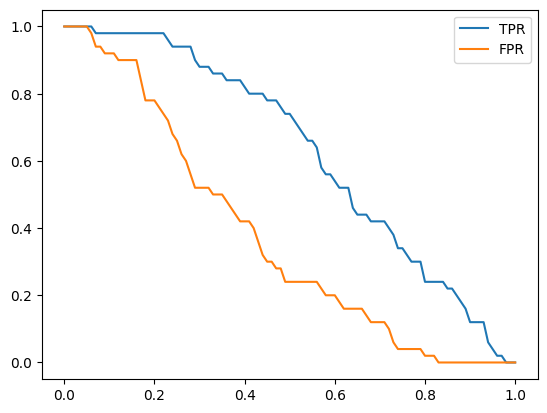

In [11]:
plt.plot(df_scores.threshold, df_scores['tpr'], label='TPR')
plt.plot(df_scores.threshold, df_scores['fpr'], label='FPR')
plt.legend()

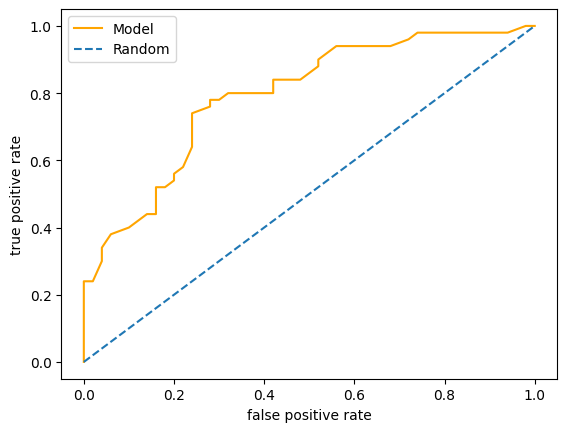

In [12]:
#plt.scatter(df_scores.fpr, df_scores.tpr, linestyle='-',color='orange', label='Model')
plt.plot(df_scores.fpr, df_scores.tpr, linestyle='-',color='orange', label='Model')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.legend()

##Random model

In [13]:
np.random.seed(1)
y_rand = np.random.uniform(0, 1, size=len(y_val))

In [14]:
((y_rand >= 0.5) == y_val).mean()

0.55

In [15]:
df_rand = tpr_fpr_dataframe(y_val, y_rand)

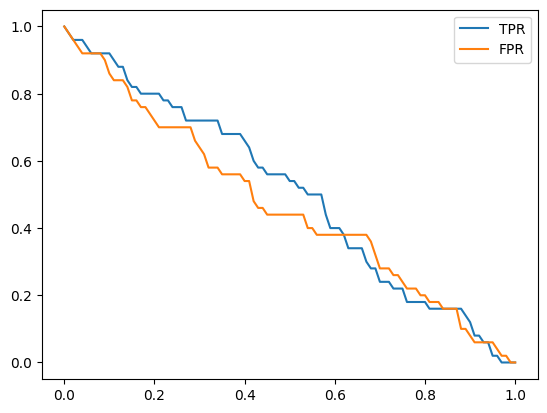

In [16]:
plt.plot(df_rand.threshold, df_rand['tpr'], label='TPR')
plt.plot(df_rand.threshold, df_rand['fpr'], label='FPR')
plt.legend()

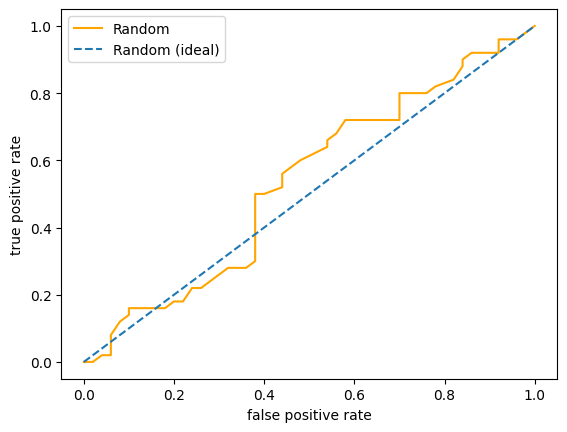

In [17]:
#plt.scatter(df_rand.fpr, df_rand.tpr, linestyle='-',color='orange', label='Model')
plt.plot(df_rand.fpr, df_rand.tpr, linestyle='-',color='orange', label='Random')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random (ideal)')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.legend()